<a href="https://colab.research.google.com/github/vibnn/verydeep/blob/main/Lab_5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


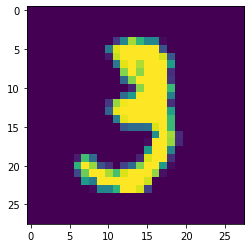

In [3]:
plt.imshow(x_train[10])

In [4]:
x_valid, x_train = x_train[:2000], x_train[2000:4000]
y_valid, y_train = y_train[:2000], y_train[2000:4000]

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(124, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 124)               63612     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 1,393,502
Trainable params: 1,393,502
Non-trainable params: 0
_________________________________________________________________


In [9]:
class PrintDot(keras.callbacks.Callback):

    def on_epoch(self, epoch, logs):

        if epoch % 25 == 0:
            print(' ')
        print('.', end='')

In [10]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data =(x_valid, y_valid), callbacks=[PrintDot()], verbose=0)

In [11]:
model.evaluate(x_train, y_train)

63/63 [==============================] - 1s 5ms/step - loss: 0.0835 - accuracy: 0.9880


[0.08349526673555374, 0.9879999756813049]

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8976


[0.3446117043495178, 0.897599995136261]